# 03. 언어 모델(Language Model)
- 언어 모델(Languagel Model): 단어 시퀀스(문장)에 확률을 할당하는 모델

## 03-01 언어 모델(Language Model)이란?
- 통계를 이용한 방법과 인공 신경망을 이용한 방법으로 구분
- 통계를 이용한 방법보다는 인공 신경망을 이용한 방법이 더 좋은 성능을 보여줌
- GPT나 BERT 또한 인공 신경망 언어 모델의 개념을 사용

### 1. 언어 모델(Language Model)
- 언어모델: 단어 시퀀스에 확률을 할당(assign)하는 모델
- 이전 단어들이 주어졌을 때 다음 단어를 예측
- 언어 모델링: 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업

### 2. 단어 시퀀스의 확률 할당

#### a. 기계 번역(Machine Translation)
- P(나는 버스를 탔다) > P(나는 버스를 태운다)
  - 언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단

#### b. 오타 교정(Spell Correction)
- 선생님이 교실로 부리나케 P(달려갔다) > P(잘려갔다)  
  - 언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단

#### c. 음성 인식(Speech Recognition)
- P(나는 메롱을 먹는다) < P(나는 메론을 먹는다)
  - 언어 모델은 두 문장을 비교하여 우측의 문장의 확률이 더 높다고 판단

**언어 모델은 위와 같이 확률을 통해 보다 적절한 문장을 판단**


### 3. 주어진 이전 단어들로 부터 다음 단어 예측하기

#### A. 단어 시퀀스의 확률
$$P(W) = P(w_1, w_2, w_3, w_4, w_5, ... ,w_n)$$

#### B. 다음 단어 등장 확률
$$P(w_n | w_1, ..., w_{n-1})$$

#### 단어 시퀀스의 확률
$$P(W) = P(w_1, w_2, w_3, w_4, w_5, ... w_n) = \prod_{i=1}^{n}P(w_{i} | w_{1}, ... , w_{i-1})$$

### 4. 언어 모델의 간단한 직관
- 비행기를 타려고 공항에 갔는데 지각을 하는 바람에 비행기를 [?].
- 여기서 사람은 쉽게 놓쳤다가 나올 것을 예상 가능
- 기계도 비슷하게 앞에 어떤 단어들이 나왔는지 고려하여 후보가 될 수 있는 여러 단어들에 대해서 등장 확률을 추정하고 가장 높은 확률을 가진 단어를 선택.

### 5. 검색 엔진에서의 언어 모델의 예
![image.png](https://wikidocs.net/images/page/21668/%EB%94%A5_%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C.PNG)
- 다음 단어를 예측하는 언어 모델 사용

## 03-02 통계적 언어 모델(Statistical Language Model, SLM)

### 1. 조건부 확률
- 조건부 확률은 확률 $P(A), P(B)$에 대해서 아래와 같은 관계를 가짐
  - $P(B|A) = P(A,B)/P(A)$
  - $P(A,B) = P(A)P(B|A)$
- 4개의 확률이 조건부 확률의 관계를 가질때
  - $P(A,B,C,D) = P(A)P(B|A)P(C|A,B)P(D|A,B,C)$
- n개의 확률이 조건부 확률의 관계를 가질때(연쇄법칙)
  - $P(x_1, x_2, x_3 ... x_n) = P(x_1)P(x_2|x_1)P(x_3|x_1,x_2)...P(x_n|x_1 ... x_{n-1})$


### 2. 문장에 대한 확률
- 문장의 확률은 각 단어들이 이전 단어가 주어졌을 때 다음 단어로 등장할 확률의 곱으로 구성
- $P(w_1, w_2, w_3, w_4, w_5, ... w_n) = \prod_{n=1}^{n}P(w_{n} | w_{1}, ... , w_{n-1})$
- $P(\text{An adorable little boy is spreading smiles}) =
P(\text{An})  ×  P(\text{adorable|An})  ×  P(\text{little|An adorable})  ×  P(\text{boy|An adorable little})
         ×  P(\text{is|An adorable little boy})
×  P(\text{spreading|An adorable little boy is})  ×  P(\text{smiles|An adorable little boy is spreading})$

### 3. 카운트 기반의 접근
-  SLM은 이전 단어로부터 다음 단어에 대한 확률을 카운트에 기반하여 계산
- $P\text{(is|An adorable little boy}) = \frac{\text{count(An adorable little boy is})}{\text{count(An adorable little boy })}$
-  An adorable little boy가 100번 등장했는데 그 다음에 is가 등장한 경우는 30번이라고 합시다. 이 경우 $P(\text{is|An adorable little boy})$는 30%

### 4. 카운트 기반 접근의 한계 - 희소 문제 (Sparsity Problem)
- 희소 문제(sparsity problem):  충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제
- 완화하는 방법으로 n-gram 언어 모델, 스무딩이나 백오프와 같은 여러가지 일반화(generalization) 기법이 존재
- 이러한 한계로 인해 언어 모델의 트렌드는 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어감

## 03-03 N-gram 언어 모델(N-gram Language Model)
- 카운트에 기반한 통계적 접근을 사용하고 있으므로 SLM의 일종
- 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하는 접근 방법을 사용
- 일부 단어를 몇 개 보느냐를 결정하는데 이것이 n-gram에서의 n이 가지는 의미

### 1. 코퍼스에서 카운트하지 못하는 경우의 감소.
- SLM의 한계는 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다는 점
- 계산하고 싶은 문장이 길어질수록 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높음
- 참고하는 단어들을 줄이면 카운트를 할 수 있을 가능성을 높일 수 있음
  - $P(\text{is|An adorable little boy}) \approx\ P(\text{is|boy})$
  - $P(\text{is|An adorable little boy}) \approx\ P(\text{is|little boy})$
- 단어의 확률을 구하고자 기준 단어의 앞 단어를 전부 포함해서 카운트하는 것이 아니라, 앞 단어 중 임의의 개수만 포함해서 카운트하여 근사
- 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률 상승
  
### 2. N-gram
- unigrams : an, adorable, little, boy, is, spreading, smiles
- bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
- trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
- 4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles
- n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존
  - ex) n=4라고 한 4-gram을 이용한 언어 모델을 사용한다고 합시다. 이 경우, spreading 다음에 올 단어를 예측하는 것은 n-1에 해당되는 앞의 3개의 단어만을 고려
  

### 3. N-gram Language Model의 한계
#### (1) 희소 문제(Sparsity Problem)
- n-gram 언어 모델도 여전히 n-gram에 대한 희소 문제가 존재

#### (2) n을 선택하는 것은 trade-off 문제
- n을 크게 선택하면 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률은 적어지므로 희소 문제는 점점 심각
- n을 작게 선택하면 훈련 코퍼스에서 카운트는 잘 되겠지만 근사의 정확도는 현실의 확률분포와 멀어짐
- n은 최대 5를 넘게 잡아서는 안 된다고 권장

### 4. 적용 분야(Domain)에 맞는 코퍼스의 수집
- 훈련에 사용된 도메인 코퍼스가 무엇이냐에 따라서 성능이 비약적으로 달라짐

### 5. 인공 신경망을 이용한 언어 모델(Neural Network Based Language Model)
- N-gram Language Model의 한계점을 극복하기위해 분모, 분자에 숫자를 더해서 카운트했을 때 0이 되는 것을 방지하는 등의 여러 일반화(generalization) 방법들이 존재
- 대안으로 N-gram Language Model보다 대체적으로 성능이 우수한 인공 신경망을 이용한 언어 모델이 많이 사용

## 03-04 한국어에서의 언어 모델(Language Model for Korean Sentences)
- 한국어는 언어 모델로 다음 단어를 예측하기가 훨씬 까다로움

### 1. 한국어는 어순이 중요하지 않다.
- 어순이 중요하지 않다 == 다음 단어로 어떤 단어든 등장할 수 있다

>1. 나는 운동을 합니다 체육관에서.  
>2. 나는 체육관에서 운동을 합니다.  
>3. 체육관에서 운동을 합니다.  
>4. 나는 운동을 체육관에서 합니다.

- 단어 순서를 뒤죽박죽으로 바꾸어놔도 한국어는 의미가 전달 되기 때문에 확률에 기반한 언어 모델이 제대로 다음 단어를 예측하기가 어려움

### 2. 한국어는 교착어이다.
- 교착어인 한국어에는 조사 존재
-  '그녀'라는 단어 하나만 해도 그녀가, 그녀를, 그녀의, 그녀와, 그녀로, 그녀께서, 그녀처럼 등과 같이 다양한 경우
- 한국어에서는 토큰화를 통해 접사나 조사 등을 분리하는 것은 중요한 작업

### 3. 한국어는 띄어쓰기가 제대로 지켜지지 않는다.
- 토큰이 제대로 분리 되지 않는채 훈련 데이터로 사용된다면 언어 모델은 제대로 동작하지 않음

## 03-05 펄플렉서티(Perplexity, PPL)

### 1. 언어 모델의 평가 방법(Evaluation metric) : PPL
- PPL: perplexity, 헷갈리는 정도
- 낮을수록 언어 모델의 성능이 좋다는 것을 의미
- 문장 $W$의 길이가 $N$이라고 했을때 PPL
  - $PPL(W)=P(w_{1}, w_{2}, w_{3}, ... , w_{N})^{-\frac{1}{N}}=\sqrt[N]{\frac{1}{P(w_{1}, w_{2}, w_{3}, ... , w_{N})}}$
- chain rule 적용
  - $PPL(W)=\sqrt[N]{\frac{1}{P(w_{1}, w_{2}, w_{3}, ... , w_{N})}}=\sqrt[N]{\frac{1}{\prod_{i=1}^{N}P(w_{i}| w_{1}, w_{2}, ... , w_{i-1})}}$
- bigram 언어 모델 경우
  - $PPL(W)=\sqrt[N]{\frac{1}{\prod_{i=1}^{N}P(w_{i}| w_{i-1})}}$

### 2. 분기 계수(Branching factor)
- PPL은 이 언어 모델이 특정 시점에서 평균적으로 몇 개의 선택지를 가지고 고민하고 있는지를 의미
$$PPL(W)=P(w_{1}, w_{2}, w_{3}, ... , w_{N})^{-\frac{1}{N}}=(\frac{1}{10}^{N})^{-\frac{1}{N}}=\frac{1}{10}^{-1}=10$$
- 평가 방법에 있어서 주의할 점은 PPL의 값이 낮다는 것은 테스트 데이터 상에서 높은 정확도를 보인다는 것이지, 사람이 직접 느끼기에 좋은 언어 모델이라는 것을 반드시 의미하진 않는다

### 3. 기존 언어 모델 Vs. 인공 신경망을 이용한 언어 모델.
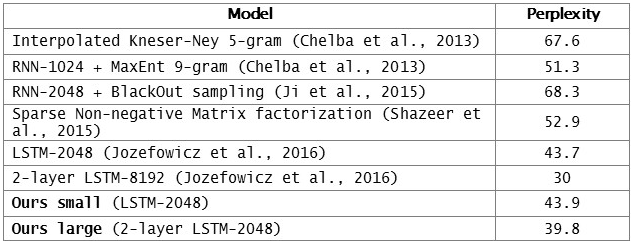
- 인공 신경망을 이용한 언어 모델들은 대부분 n-gram을 이용한 언어 모델보다 더 좋은 성능 평가를 받았음

## 03-06 조건부 확률(Conditional Probability)

![img](https://wikidocs.net/images/page/21681/%EC%A1%B0%EA%B1%B4%EB%B6%80_%ED%99%95%EB%A5%A0.PNG)

A = 학생이 남학생인 사건
B = 학생이 여학생인 사건
C = 학생이 중학생인 사건
D = 학생이 고등학생인 사건

1. 학생을 뽑았을 때, 남학생일 확률
   - $P(A)$ = 180/360=0.5

2. 학생을 뽑았을 때, 고등학생이면서 남학생일 확률
   - $P(A∩D)$ = 80/360

3. 고등학생 중 한명을 뽑았을 때, 남학생일 확률
   - $P(A|D)$ = 80/200 = $P(A∩D)/P(D)$ = (80/360)/(200/360) = 80/200 = 0.4